In [208]:
ENV["Code"] = "../../Code"
for folder in readdir(ENV["Code"]); push!(LOAD_PATH, normpath(ENV["Code"], folder));end

using Seaborn, PyPlot, PyCall, DataFrames
using NoLongerProblems_Pandas, Pandas
using MultipleTesting, HypothesisTests 
using SingleCellExperiment, StatsBase
using ProgressMeter, Random
using InformationMeasures
using CSV, ProgressMeter,PrettyPlotting, ScikitLearn
@sk_import linear_model: LogisticRegression

include("../Databases/Cuartero2018.jl")
include("../Databases/Bhatt2012.jl")
include("../Databases/MF_SingleCell.jl")
include("NMIFunctions")







NMI_figure (generic function with 1 method)

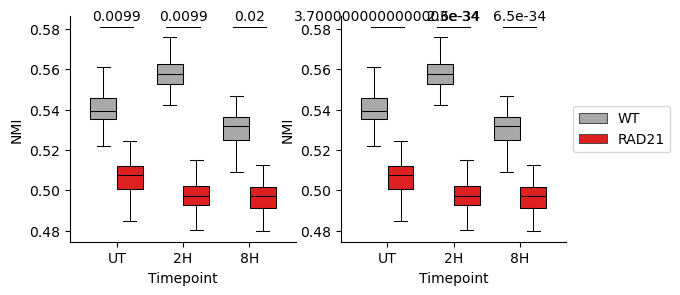

0.009900990099009901
0.009900990099009901
0.019801980198019802
3.6728188105276557e-34
2.5618550313305356e-34
6.484371869888851e-34


In [209]:
include("../Code/Load_scRNAseqData.jl")
sce = SingleCellExperiment.get_cells_with_this_characteristics(["WT", "RAD21"], :Genotype, sce)
sce = SingleCellExperiment.select_expressed_genes(sce; min_cells_expressing_gene = 100)
sce = SingleCellExperiment.fit_mu_std_alpha(sce, splitdataby = :Sample, assay = "CPM")
tb = NMI_table(sce)
subplot(1,2,1)
NMI_figure(tb, pvalue_ = :option1)
legend_removal()
subplot(1,2,2)
NMI_figure(tb, pvalue_ = :option2)
legend_out_of_plot()
savefigwithtext("SingleCell_NMI.svg")
savefigwithtext("SingleCell_NMI.png")

0.10891089108910891
0.009900990099009901
0.009900990099009901


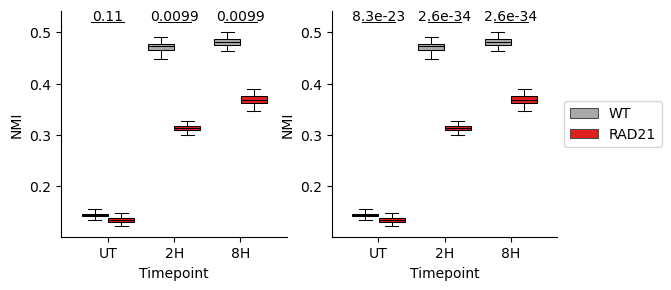

8.281293462261919e-23
2.5621436691633854e-34
2.5621436691633854e-34


In [211]:
include("../Code/Load_scRNAseqData.jl")
sce = SingleCellExperiment.get_cells_with_this_characteristics(["WT", "RAD21"], :Genotype, sce)
sce = SingleCellExperiment.select_expressed_genes(sce; min_cells_expressing_gene = 100)
sce = SingleCellExperiment.fit_mu_std_alpha(sce, splitdataby = :Sample, assay = "CPM")
bhattgenes = Bhatt2012.inducible_genes_figure3()[!,:GeneSymbol];
sce = SingleCellExperiment.select_these_genes(bhattgenes, sce)
tb = NMI_table(sce)
subplot(1,2,1)
NMI_figure(tb, pvalue_ = :option1, u = 0.01)
legend_removal()
subplot(1,2,2)
NMI_figure(tb, pvalue_ = :option2, u = 0.01)
legend_out_of_plot()
savefigwithtext("SingleCell_NMIBhatt.svg")
savefigwithtext("SingleCell_NMIBhatt.png")

In [205]:
import Pkg
Pkg.status()

      Status `~/.julia/environments/v1.6/Project.toml`
  [7e6ae17a] BioSequences v2.0.5
  [336ed68f] CSV v0.9.11
  [8f4d0f93] Conda v1.5.2
  [a93c6f00] DataFrames v1.2.2
  [31c24e10] Distributions v0.25.28
  [c2308a5c] FASTX v1.2.0
  [09f84164] HypothesisTests v0.10.6
  [7073ff75] IJulia v1.23.2
  [916415d5] Images v0.24.1
  [96684042] InformationMeasures v0.3.1
  [f8716d33] MultipleTesting v0.5.0
  [92933f4c] ProgressMeter v1.7.1
  [438e738f] PyCall v1.92.5
  [d330b81b] PyPlot v2.10.0
  [6f49c342] RCall v0.13.12
  [d2ef9438] Seaborn v1.0.0
  [2913bbd2] StatsBase v0.33.13
